In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date, datetime, timedelta

In [56]:
from flask import Flask, render_template, redirect, url_for, jsonify

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
from sqlalchemy import text

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(text('date desc')).first()

print(f'The most recent date in the data set is {recent_date}')

The most recent date in the data set is ('2017-08-23',)


In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

query = session.query(Measurement.date, Measurement.prcp, ).filter(
    Measurement.date < dt.date(2017,8,23), Measurement.date > dt.date(2016,8,23)).all()
query

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [33]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(query, columns=["Date", "Precipitation"])
prcp_df["Date"] = pd.to_datetime(prcp_df["Date"])
prcp_df.set_index("Date", inplace=True)
prcp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-18,NaN
2017-08-19,0.09
2017-08-20,NaN


In [34]:
# Sort the dataframe by date
prcp_df.sort_values(by="Date", inplace=True)
prcp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-21,NaN
2017-08-21,0.02
2017-08-22,0.00


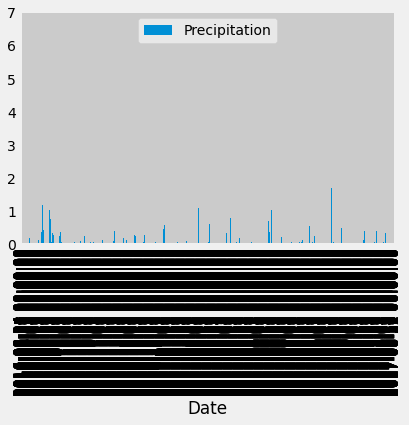

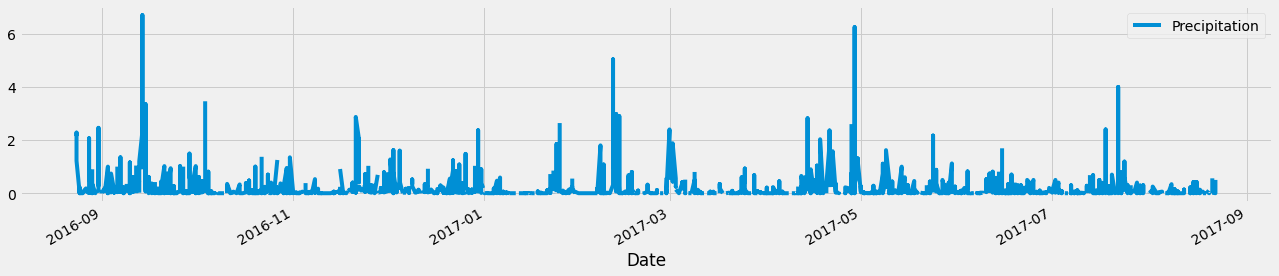

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data


prcp_df.plot.bar(y="Precipitation")
prcp_df.plot(figsize=(20,4))

In [24]:
#get rid of NaN values 
prcp_df = prcp_df.dropna()
prcp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-21,0.00
2017-08-21,0.02
2017-08-22,0.00


In [25]:
#turn dataframe into dictionary 
prcp_dict = prcp_df.to_dict('records')
prcp_dict

[{'Precipitation': 0.08},
 {'Precipitation': 2.15},
 {'Precipitation': 2.28},
 {'Precipitation': 2.15},
 {'Precipitation': 1.45},
 {'Precipitation': 1.22},
 {'Precipitation': 0.0},
 {'Precipitation': 0.06},
 {'Precipitation': 0.11},
 {'Precipitation': 0.08},
 {'Precipitation': 0.21},
 {'Precipitation': 0.08},
 {'Precipitation': 0.0},
 {'Precipitation': 0.0},
 {'Precipitation': 0.0},
 {'Precipitation': 0.02},
 {'Precipitation': 0.01},
 {'Precipitation': 0.03},
 {'Precipitation': 0.04},
 {'Precipitation': 0.18},
 {'Precipitation': 0.12},
 {'Precipitation': 0.02},
 {'Precipitation': 0.0},
 {'Precipitation': 0.0},
 {'Precipitation': 0.14},
 {'Precipitation': 0.14},
 {'Precipitation': 0.14},
 {'Precipitation': 0.01},
 {'Precipitation': 2.07},
 {'Precipitation': 0.6},
 {'Precipitation': 0.04},
 {'Precipitation': 0.9},
 {'Precipitation': 0.0},
 {'Precipitation': 0.17},
 {'Precipitation': 0.0},
 {'Precipitation': 0.35},
 {'Precipitation': 0.0},
 {'Precipitation': 0.02},
 {'Precipitation': 0.0}

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [36]:
session.query(Measurement.station).distinct().all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station,
              func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
session.query(Measurement.date, Measurement.prcp, ).filter(
    Measurement.date < dt.date(2016,8,23), Measurement.date > dt.date(2015,8,23)).filter(Measurement.station== 'USC00519281').all()

[('2015-08-24', 3.62),
 ('2015-08-25', 0.31),
 ('2015-08-26', 0.6),
 ('2015-08-27', 2.96),
 ('2015-08-28', 0.05),
 ('2015-08-29', 0.01),
 ('2015-08-30', 0.05),
 ('2015-08-31', 0.02),
 ('2015-09-01', 0.3),
 ('2015-09-02', 0.01),
 ('2015-09-03', 0.0),
 ('2015-09-04', 1.35),
 ('2015-09-05', 0.0),
 ('2015-09-06', 0.0),
 ('2015-09-07', 0.97),
 ('2015-09-08', 0.74),
 ('2015-09-09', 0.0),
 ('2015-09-10', 0.09),
 ('2015-09-11', 0.69),
 ('2015-09-12', 3.1),
 ('2015-09-13', 0.26),
 ('2015-09-14', 0.52),
 ('2015-09-15', 1.61),
 ('2015-09-16', 0.41),
 ('2015-09-17', 0.07),
 ('2015-09-18', 0.42),
 ('2015-09-19', 0.07),
 ('2015-09-20', 0.25),
 ('2015-09-21', 0.63),
 ('2015-09-22', 0.37),
 ('2015-09-23', 0.48),
 ('2015-09-24', 0.11),
 ('2015-09-25', 0.2),
 ('2015-09-26', 0.49),
 ('2015-09-27', 0.45),
 ('2015-09-28', 0.77),
 ('2015-09-29', 0.8),
 ('2015-09-30', 0.14),
 ('2015-10-01', 0.0),
 ('2015-10-02', 0.06),
 ('2015-10-03', 0.0),
 ('2015-10-04', 0.09),
 ('2015-10-05', 1.46),
 ('2015-10-06', 0.19),

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Lowest temperature:
session.query(Measurement.station, Measurement.prcp,
             func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519397').all()

[('USC00519397', 0.05, 56.0)]

In [16]:
#Highest temperature:

session.query(Measurement.station, Measurement.prcp,
             func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519397').all()

[('USC00519397', 0.01, 87.0)]

In [17]:
#Average temperature:

session.query(Measurement.station, Measurement.prcp,
             func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519397').all()

[('USC00519397', 0.08, 74.55323054331865)]

In [60]:
# session.query(Measurement.date, Measurement.prcp, ).filter(
#     Measurement.date < dt.date(2017,8,23), Measurement.date > dt.date(2016,8,23)).all()


session.query(Measurement.station, Measurement.prcp,
             func.avg(Measurement.tobs)).filter(Measurement.date < dt.date(2017,8,23), Measurement.date > dt.date(2016,8,23)).all()

[('USC00519397', 0.08, 74.56872465074358)]

In [55]:
# Using the most active station id, query the last 12 months of temperature observation data for this station 

USC00519397 = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519397',
    Measurement.date < dt.date(2017,8,23), Measurement.date > dt.date(2016,8,23)).all()

USC00519397

[(79.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (80.0,),
 (81.0,),
 (80.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (81.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (82.0,),
 (81.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (80.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (76.0,),
 (75.0,),
 (80.0,),
 (80.0,),
 (79.0,),
 (80.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (80.0,),
 (81.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (72.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (76.0,),
 (75.0,),
 (68.0,),
 (75.0,),
 (75.0,),


In [63]:
session.query(func.min(Measurement.tobs)).filter(Measurement.date >= dt.date(2017,8,23)).all()

[(76.0,)]

In [40]:
# Plot the results as a histogram

USC00519397_df = pd.DataFrame(USC00519397)
USC00519397_df

,tobs
0,79.0
1,80.0
2,79.0
3,77.0
4,78.0
...,...
354,80.0
355,79.0
356,81.0
357,81.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002276B1CC148>]],
      dtype=object)

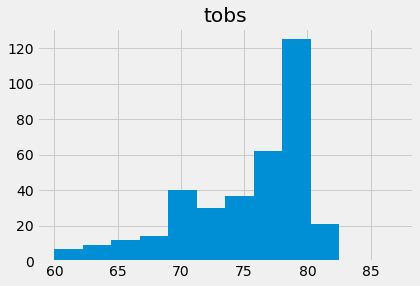

In [41]:
USC00519397_df.hist(bins=12)

# Close session

In [42]:
# Close Session
session.close()